In [ ]:
import pandas as pd
import numpy as np
import sklearn
from pandas import DataFrame
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


----------------------------------------------------

**Decision Tree Learning**

In [ ]:
df = pd.read_csv("v3.2.2_train.csv")

# Training data
X = df.iloc[:, 1:26]

# Labels
y = df.iloc[:, 26:]
y_label = list(y.columns)
lst_labels = []
for index, row in y.iterrows():
    loc = np.where(np.asarray(row) == 1)[0][0]
    lst_labels.append(y_label[loc])

# Target values ['TOT_fast', 'TOT_med_fast', 'TOT_med', 'TOT_med_slow', 'TOT_slow']
Y = DataFrame(lst_labels, columns=['Target'])

# Split in train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 10, 
                             random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

pred = clf.predict(X_test)

In [ ]:
# accuracy of predictions using decision tree
sklearn.metrics.accuracy_score(pred, y_test)

0.4565025140075061

**Visualization with Graphviz**

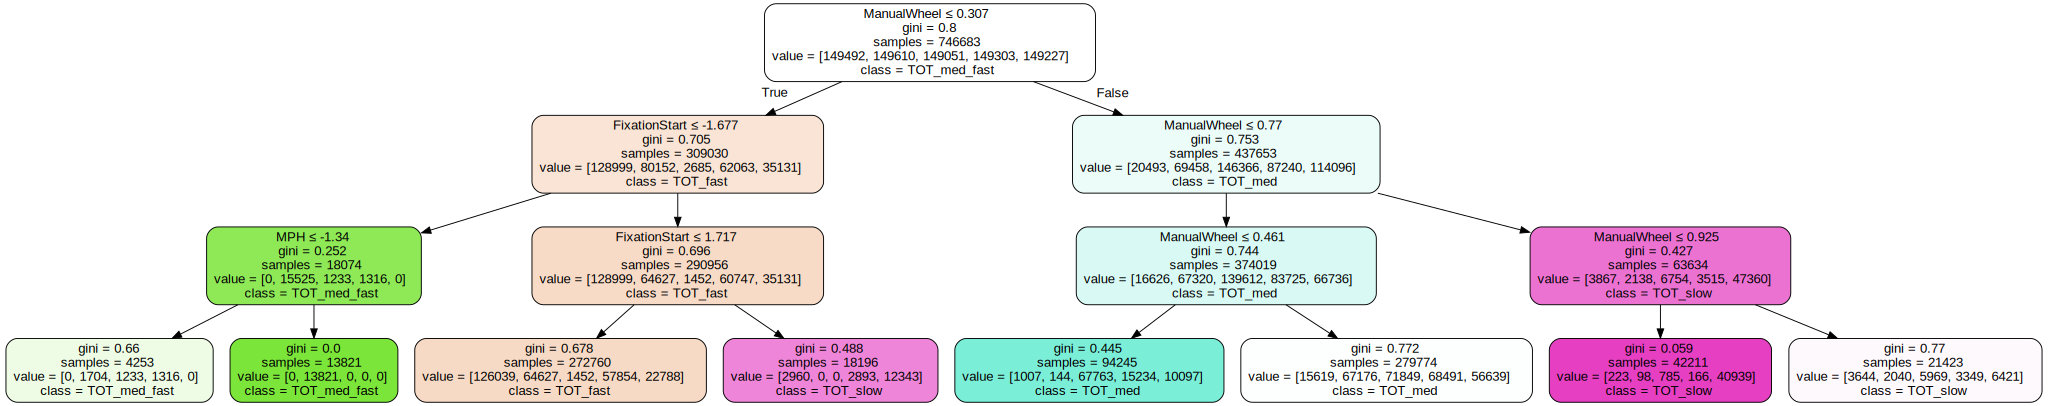

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=list(X_train.columns),  
                      class_names=y_label,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Display all rules using export_text**


In [ ]:
r = export_text(clf, feature_names = list(X_train.columns))
print(r)

|--- ManualWheel <= 0.31
|   |--- FixationStart <= -1.68
|   |   |--- MPH <= -1.34
|   |   |   |--- FixationSeq <= -1.70
|   |   |   |   |--- MPH <= -2.13
|   |   |   |   |   |--- class: TOT_med
|   |   |   |   |--- MPH >  -2.13
|   |   |   |   |   |--- class: TOT_med_fast
|   |   |   |--- FixationSeq >  -1.70
|   |   |   |   |--- class: TOT_med_slow
|   |   |--- MPH >  -1.34
|   |   |   |--- class: TOT_med
|   |--- FixationStart >  -1.68
|   |   |--- FixationStart <= 1.72
|   |   |   |--- ManualWheel <= -1.86
|   |   |   |   |--- ManualWheel <= -2.17
|   |   |   |   |   |--- FixationSeq <= 0.97
|   |   |   |   |   |   |--- PupilRight <= -0.32
|   |   |   |   |   |   |   |--- MPH <= 0.91
|   |   |   |   |   |   |   |   |--- MPH <= 0.44
|   |   |   |   |   |   |   |   |   |--- MPH <= -3.64
|   |   |   |   |   |   |   |   |   |   |--- class: TOT_med
|   |   |   |   |   |   |   |   |   |--- MPH >  -3.64
|   |   |   |   |   |   |   |   |   |   |--- class: TOT_fast
|   |   |   |   |   |   |

**Datapoints satisfying a rule**

ManualWheel <= 0.307 & FixationStart <= -1.677 & MPH > -1.34 : class = TOT_med

In [ ]:
#@title Code
def rule_specific_data(X_test, y_test, pred):

  feats = list(X_test.columns)

  test_x_arr = np.asarray(X_test)
  test_y_arr = np.asarray(y_test)
  pred = np.asarray(pred)


  rule1_lst = []
  for dpoint in range(len(X_test)):
      tmp1_lst = []    
      if (X_test.iloc[dpoint, feats.index('ManualWheel')] <= 0.307) and (X_test.iloc[dpoint, feats.index('FixationStart')] <= -1.677) and (X_test.iloc[dpoint, feats.index('MPH')] <= -1.34):
        tmp1_lst.extend(test_x_arr[dpoint])
        tmp1_lst.extend(test_y_arr[dpoint])
        tmp1_lst.append('TOT_med')
        rule1_lst.append(tmp1_lst)
  print("Number of datapoints satisfying the rule: " + str(len(rule1_lst)))
  new_feats = feats + ['Target'] + ['Prediction']
  rule_df = pd.DataFrame(np.asarray(rule1_lst), columns = new_feats)
  acc_rule = sklearn.metrics.accuracy_score(rule_df['Target'], rule_df['Prediction'])
  print("Percentage of datapoints satisfying the rule classified correctly: " + str(acc_rule*100) + "%")


In [ ]:
rule_specific_data(X_test, y_test, pred)

Number of datapoints satisfying the rule: 1863
Percentage of datapoints satisfying the rule classified correctly: 39.77455716586151%


--------------------------------------------------------------------------------

ManualWheel > 0.307 & ManualWheel <= 0.77 & ManualWheel <= 0.461 & InterpolatedGazeY > 0.109 & FixationSequence <= 0.62 & Distance3D > 0.283 & FixationSequence > -0.043 & AutoWheel > 0.887 : CLASS: TOT_fast

In [ ]:
def rule_specific_data(X_test, y_test, pred):

  feats = list(X_test.columns)
  print(feats)
  test_x_arr = np.asarray(X_test)
  test_y_arr = np.asarray(y_test)
  pred = np.asarray(pred)


  rule1_lst = []
  for dpoint in range(len(X_test)):
      tmp1_lst = []    
      if (X_test.iloc[dpoint, feats.index('ManualWheel')] > 0.307) and (X_test.iloc[dpoint, feats.index('ManualWheel')] <= 0.77) and (X_test.iloc[dpoint, feats.index('ManualWheel')] <= 0.461) and (X_test.iloc[dpoint, feats.index('InterpolatedGazeY')] > 0.109) and (X_test.iloc[dpoint, feats.index('FixationSeq')] <= 0.62) and (X_test.iloc[dpoint, feats.index('Distance3D')] > 0.283) and (X_test.iloc[dpoint, feats.index('FixationSeq')] > -0.043) and (X_test.iloc[dpoint, feats.index('AutoWheel')] > 0.887):
        tmp1_lst.extend(test_x_arr[dpoint])
        tmp1_lst.extend(test_y_arr[dpoint])
        tmp1_lst.append('TOT_fast')
        rule1_lst.append(tmp1_lst)
  print("Number of datapoints satisfying the rule: " + str(len(rule1_lst)))
  new_feats = feats + ['Target'] + ['Prediction']
  rule_df = pd.DataFrame(np.asarray(rule1_lst), columns = new_feats)

  acc_rule = sklearn.metrics.accuracy_score(rule_df['Target'], rule_df['Prediction'])
  print("Percentage of datapoints satisfying the rule classified correctly: " + str(acc_rule*100) + "%")

In [ ]:
rule_specific_data(X_test, y_test, pred)

['FixationDuration', 'FixationSeq', 'FixationStart', 'FixationX', 'FixationY', 'GazeDirectionLeftZ', 'GazeDirectionRightZ', 'PupilLeft', 'PupilRight', 'InterpolatedGazeX', 'InterpolatedGazeY', 'AutoThrottle', 'AutoWheel', 'CurrentThrottle', 'CurrentWheel', 'Distance3D', 'MPH', 'ManualBrake', 'ManualThrottle', 'ManualWheel', 'RangeW', 'RightLaneDist', 'RightLaneType', 'LeftLaneDist', 'LeftLaneType']
Number of datapoints satisfying the rule: 39
Percentage of datapoints satisfying the rule classified correctly: 100.0%


ManualWheel > 0.307 & ManualWheel <= 0.77 & ManualWheel <= 0.461 & InterpolatedGazeY > 0.109 & FixationSequence <= 0.62 & Distance3D > 0.283 & FixationSequence > -0.043 & AutoWheel <= 0.887 : CLASS: TOT_med_slow

In [ ]:
def rule_specific_data(X_test, y_test, pred):

  feats = list(X_test.columns)
  print(feats)
  test_x_arr = np.asarray(X_test)
  test_y_arr = np.asarray(y_test)
  pred = np.asarray(pred)


  rule1_lst = []
  for dpoint in range(len(X_test)):
      tmp1_lst = []    
      if (X_test.iloc[dpoint, feats.index('ManualWheel')] > 0.307) and (X_test.iloc[dpoint, feats.index('ManualWheel')] <= 0.77) and (X_test.iloc[dpoint, feats.index('ManualWheel')] <= 0.461) and (X_test.iloc[dpoint, feats.index('InterpolatedGazeY')] > 0.109) and (X_test.iloc[dpoint, feats.index('FixationSeq')] <= 0.62) and (X_test.iloc[dpoint, feats.index('Distance3D')] > 0.283) and (X_test.iloc[dpoint, feats.index('FixationSeq')] > -0.043) and (X_test.iloc[dpoint, feats.index('AutoWheel')] <= 0.887):
        tmp1_lst.extend(test_x_arr[dpoint])
        tmp1_lst.extend(test_y_arr[dpoint])
        tmp1_lst.append('TOT_med_slow')
        rule1_lst.append(tmp1_lst)
  print("Number of datapoints satisfying the rule: " + str(len(rule1_lst)))
  new_feats = feats + ['Target'] + ['Prediction']
  rule_df = pd.DataFrame(np.asarray(rule1_lst), columns = new_feats)

  acc_rule = sklearn.metrics.accuracy_score(rule_df['Target'], rule_df['Prediction'])
  print("Percentage of datapoints satisfying the rule classified correctly: " + str(acc_rule*100) + "%")

rule_specific_data(X_test, y_test, pred)

['FixationDuration', 'FixationSeq', 'FixationStart', 'FixationX', 'FixationY', 'GazeDirectionLeftZ', 'GazeDirectionRightZ', 'PupilLeft', 'PupilRight', 'InterpolatedGazeX', 'InterpolatedGazeY', 'AutoThrottle', 'AutoWheel', 'CurrentThrottle', 'CurrentWheel', 'Distance3D', 'MPH', 'ManualBrake', 'ManualThrottle', 'ManualWheel', 'RangeW', 'RightLaneDist', 'RightLaneType', 'LeftLaneDist', 'LeftLaneType']
Number of datapoints satisfying the rule: 35
Percentage of datapoints satisfying the rule classified correctly: 100.0%


ManualWheel <= 0.307 & FixationStart > -1.677 & FixationStart > 1.717 & PupilLeft > 0.424 & FixationStart > 1.924 : CLASS = TOT_slow

In [ ]:
def rule_specific_data(X_test, y_test, pred):

  feats = list(X_test.columns)
  print(feats)
  test_x_arr = np.asarray(X_test)
  test_y_arr = np.asarray(y_test)
  pred = np.asarray(pred)


  rule1_lst = []
  for dpoint in range(len(X_test)):
      tmp1_lst = []    
      if (X_test.iloc[dpoint, feats.index('ManualWheel')] <= 0.307) and (X_test.iloc[dpoint, feats.index('FixationStart')] > -1.677) and (X_test.iloc[dpoint, feats.index('FixationStart')] > 1.717) and (X_test.iloc[dpoint, feats.index('PupilLeft')] > 0.424) and (X_test.iloc[dpoint, feats.index('FixationStart')] > 1.924):
        tmp1_lst.extend(test_x_arr[dpoint])
        tmp1_lst.extend(test_y_arr[dpoint])
        tmp1_lst.append('TOT_slow')
        rule1_lst.append(tmp1_lst)
  print("Number of datapoints satisfying the rule: " + str(len(rule1_lst)))
  new_feats = feats + ['Target'] + ['Prediction']
  rule_df = pd.DataFrame(np.asarray(rule1_lst), columns = new_feats)

  acc_rule = sklearn.metrics.accuracy_score(rule_df['Target'], rule_df['Prediction'])
  print("Percentage of datapoints satisfying the rule classified correctly: " + str(acc_rule*100) + "%")

rule_specific_data(X_test, y_test, pred)

['FixationDuration', 'FixationSeq', 'FixationStart', 'FixationX', 'FixationY', 'GazeDirectionLeftZ', 'GazeDirectionRightZ', 'PupilLeft', 'PupilRight', 'InterpolatedGazeX', 'InterpolatedGazeY', 'AutoThrottle', 'AutoWheel', 'CurrentThrottle', 'CurrentWheel', 'Distance3D', 'MPH', 'ManualBrake', 'ManualThrottle', 'ManualWheel', 'RangeW', 'RightLaneDist', 'RightLaneType', 'LeftLaneDist', 'LeftLaneType']
Number of datapoints satisfying the rule: 40
Percentage of datapoints satisfying the rule classified correctly: 100.0%


ManualWheel <= 0.307 & FixationStart <= -1.677 & MPH <= -1.34 & FixationSequence <= -1.704 & MPH > -2.126 : CLASS = TOT_med_fast

In [ ]:
def rule_specific_data(X_test, y_test, pred):

  feats = list(X_test.columns)
  print(feats)
  test_x_arr = np.asarray(X_test)
  test_y_arr = np.asarray(y_test)
  pred = np.asarray(pred)


  rule1_lst = []
  for dpoint in range(len(X_test)):
      tmp1_lst = []    
      if (X_test.iloc[dpoint, feats.index('ManualWheel')] <= 0.307) and (X_test.iloc[dpoint, feats.index('FixationStart')] <= -1.677) and (X_test.iloc[dpoint, feats.index('MPH')] <= -1.34) and (X_test.iloc[dpoint, feats.index('FixationSeq')] <= -1.704) and (X_test.iloc[dpoint, feats.index('MPH')] > -2.126):
        tmp1_lst.extend(test_x_arr[dpoint])
        tmp1_lst.extend(test_y_arr[dpoint])
        tmp1_lst.append('TOT_med_fast')
        rule1_lst.append(tmp1_lst)
  print("Number of datapoints satisfying the rule: " + str(len(rule1_lst)))
  new_feats = feats + ['Target'] + ['Prediction']
  rule_df = pd.DataFrame(np.asarray(rule1_lst), columns = new_feats)

  acc_rule = sklearn.metrics.accuracy_score(rule_df['Target'], rule_df['Prediction'])
  print("Percentage of datapoints satisfying the rule classified correctly: " + str(acc_rule*100) + "%")

rule_specific_data(X_test, y_test, pred)

['FixationDuration', 'FixationSeq', 'FixationStart', 'FixationX', 'FixationY', 'GazeDirectionLeftZ', 'GazeDirectionRightZ', 'PupilLeft', 'PupilRight', 'InterpolatedGazeX', 'InterpolatedGazeY', 'AutoThrottle', 'AutoWheel', 'CurrentThrottle', 'CurrentWheel', 'Distance3D', 'MPH', 'ManualBrake', 'ManualThrottle', 'ManualWheel', 'RangeW', 'RightLaneDist', 'RightLaneType', 'LeftLaneDist', 'LeftLaneType']
Number of datapoints satisfying the rule: 569
Percentage of datapoints satisfying the rule classified correctly: 100.0%


ManualWheel <= 0.307 & FixationStart <= -1.677 & MPH <= -1.34 & FixationSequence <= -1.704 & MPH <= -2.126 : CLASS = TOT_med

In [ ]:
def rule_specific_data(X_test, y_test, pred):

  feats = list(X_test.columns)
  print(feats)
  test_x_arr = np.asarray(X_test)
  test_y_arr = np.asarray(y_test)
  pred = np.asarray(pred)


  rule1_lst = []
  for dpoint in range(len(X_test)):
      tmp1_lst = []    
      if (X_test.iloc[dpoint, feats.index('ManualWheel')] <= 0.307) and (X_test.iloc[dpoint, feats.index('FixationStart')] <= -1.677) and (X_test.iloc[dpoint, feats.index('MPH')] <= -1.34) and (X_test.iloc[dpoint, feats.index('FixationSeq')] <= -1.704) and (X_test.iloc[dpoint, feats.index('MPH')] <= -2.126):
        tmp1_lst.extend(test_x_arr[dpoint])
        tmp1_lst.extend(test_y_arr[dpoint])
        tmp1_lst.append('TOT_med')
        rule1_lst.append(tmp1_lst)
  print("Number of datapoints satisfying the rule: " + str(len(rule1_lst)))
  new_feats = feats + ['Target'] + ['Prediction']
  rule_df = pd.DataFrame(np.asarray(rule1_lst), columns = new_feats)

  acc_rule = sklearn.metrics.accuracy_score(rule_df['Target'], rule_df['Prediction'])
  print("Percentage of datapoints satisfying the rule classified correctly: " + str(acc_rule*100) + "%")

rule_specific_data(X_test, y_test, pred)

['FixationDuration', 'FixationSeq', 'FixationStart', 'FixationX', 'FixationY', 'GazeDirectionLeftZ', 'GazeDirectionRightZ', 'PupilLeft', 'PupilRight', 'InterpolatedGazeX', 'InterpolatedGazeY', 'AutoThrottle', 'AutoWheel', 'CurrentThrottle', 'CurrentWheel', 'Distance3D', 'MPH', 'ManualBrake', 'ManualThrottle', 'ManualWheel', 'RangeW', 'RightLaneDist', 'RightLaneType', 'LeftLaneDist', 'LeftLaneType']
Number of datapoints satisfying the rule: 741
Percentage of datapoints satisfying the rule classified correctly: 100.0%


ManualWheel <= 0.307 & FixationStart <= -1.677 & MPH <= -1.34 & FixationSequence > -1.704 : class = TOT_med_slow

In [ ]:
def rule_specific_data(X_test, y_test, pred):

  feats = list(X_test.columns)
  print(feats)
  test_x_arr = np.asarray(X_test)
  test_y_arr = np.asarray(y_test)
  pred = np.asarray(pred)


  rule1_lst = []
  for dpoint in range(len(X_test)):
      tmp1_lst = []    
      if (X_test.iloc[dpoint, feats.index('ManualWheel')] <= 0.307) and (X_test.iloc[dpoint, feats.index('FixationStart')] <= -1.677) and (X_test.iloc[dpoint, feats.index('MPH')] <= -1.34) and (X_test.iloc[dpoint, feats.index('FixationSeq')] > -1.704):
        tmp1_lst.extend(test_x_arr[dpoint])
        tmp1_lst.extend(test_y_arr[dpoint])
        tmp1_lst.append('TOT_med_slow')
        rule1_lst.append(tmp1_lst)
  print("Number of datapoints satisfying the rule: " + str(len(rule1_lst)))
  new_feats = feats + ['Target'] + ['Prediction']
  rule_df = pd.DataFrame(np.asarray(rule1_lst), columns = new_feats)

  acc_rule = sklearn.metrics.accuracy_score(rule_df['Target'], rule_df['Prediction'])
  print("Percentage of datapoints satisfying the rule classified correctly: " + str(acc_rule*100) + "%")

rule_specific_data(X_test, y_test, pred)

['FixationDuration', 'FixationSeq', 'FixationStart', 'FixationX', 'FixationY', 'GazeDirectionLeftZ', 'GazeDirectionRightZ', 'PupilLeft', 'PupilRight', 'InterpolatedGazeX', 'InterpolatedGazeY', 'AutoThrottle', 'AutoWheel', 'CurrentThrottle', 'CurrentWheel', 'Distance3D', 'MPH', 'ManualBrake', 'ManualThrottle', 'ManualWheel', 'RangeW', 'RightLaneDist', 'RightLaneType', 'LeftLaneDist', 'LeftLaneType']
Number of datapoints satisfying the rule: 553
Percentage of datapoints satisfying the rule classified correctly: 100.0%


In [ ]:
def rule_specific_data(X_test, y_test, pred):

  feats = list(X_test.columns)
  print(feats)
  test_x_arr = np.asarray(X_test)
  test_y_arr = np.asarray(y_test)
  pred = np.asarray(pred)


  rule1_lst = []
  for dpoint in range(len(X_test)):
      tmp1_lst = []    
      if (X_test.iloc[dpoint, feats.index('ManualWheel')] <= 0.307) and (X_test.iloc[dpoint, feats.index('FixationStart')] <= -1.677) and (X_test.iloc[dpoint, feats.index('MPH')] <= -1.34):
        tmp1_lst.extend(test_x_arr[dpoint])
        tmp1_lst.extend(test_y_arr[dpoint])
        tmp1_lst.append('TOT_med')
        rule1_lst.append(tmp1_lst)
  print("Number of datapoints satisfying the rule: " + str(len(rule1_lst)))
  new_feats = feats + ['Target'] + ['Prediction']
  rule_df = pd.DataFrame(np.asarray(rule1_lst), columns = new_feats)

  acc_rule = sklearn.metrics.accuracy_score(rule_df['Target'], rule_df['Prediction'])
  print("Percentage of datapoints satisfying the rule classified correctly: " + str(acc_rule*100) + "%")

rule_specific_data(X_test, y_test, pred)

['FixationDuration', 'FixationSeq', 'FixationStart', 'FixationX', 'FixationY', 'GazeDirectionLeftZ', 'GazeDirectionRightZ', 'PupilLeft', 'PupilRight', 'InterpolatedGazeX', 'InterpolatedGazeY', 'AutoThrottle', 'AutoWheel', 'CurrentThrottle', 'CurrentWheel', 'Distance3D', 'MPH', 'ManualBrake', 'ManualThrottle', 'ManualWheel', 'RangeW', 'RightLaneDist', 'RightLaneType', 'LeftLaneDist', 'LeftLaneType']
Number of datapoints satisfying the rule: 1863
Percentage of datapoints satisfying the rule classified correctly: 39.77455716586151%


**Print decision tree rules**

In [ ]:
import pickle, warnings
import numpy as np
from sklearn.tree import _tree

warnings.filterwarnings(action='ignore', category=UserWarning)

# list of features (x0-x24)
features = ('FixationDuration', 'FixationSeq', 'FixationStart', 'FixationX', 'FixationY', 'GazeDirectionLeftZ', 'GazeDirectionRightZ', 'PupilLeft', 'PupilRight', 'InterpolatedGazeX', 'InterpolatedGazeY', 'AutoThrottle', 'AutoWheel', 'CurrentThrottle', 'CurrentWheel', 'Distance3D', 'MPH', 'ManualBrake', 'ManualThrottle', 'ManualWheel', 'RangeW', 'RightLaneDist', 'RightLaneType', 'LeftLaneDist', 'LeftLaneType')

# v3.2.2 scaler object (copied from scad_tot project)
scaler = pickle.load(open('./scaler.pkl', 'rb'))

# function used to convert scaled value to original
def convert(field_name, scaled_value):
    assert field_name in features, 'field does not exist in features list'
    index = features.index(field_name)
    dummy_x = np.zeros(len(features))
    dummy_x[index] = scaled_value
    return scaler.inverse_transform(dummy_x)[index]


def tree_to_code(tree, feature_names, mode = 'scaled'):
    labels_data = ['TOT_fast', 'TOT_med_fast', 'TOT_med', 'TOT_med_slow', 'TOT_slow']
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))
  
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]

            if mode == 'scaled':
              threshold = tree_.threshold[node]
              new_threshold = threshold
            elif mode == 'non_scaled':
              threshold = tree_.threshold[node]
              new_threshold = convert(name, threshold)
            else:
              print("Mode not defined")
            
            print("{}{} --- {} <= {}: \n".format(indent, indent, name, new_threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}{} --- {} > {} \n".format(indent, indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        
        else:
            val = list(tree_.value[node][0])
            class_idx = val.index(max(val))
            class_name = labels_data[class_idx]
            print("{}{} Class = {} \n".format(indent, indent, class_name))

    recurse(0, 1)

In [ ]:
# If scaled valued rules: mode = 'scaled'
# If non-scaled (raw) valued rules: mode = 'non-scaled'
tree_to_code(clf, X_train.columns, mode = 'scaled')

**Random Forests - Feature importance**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)

In [ ]:
print(model.feature_importances_)

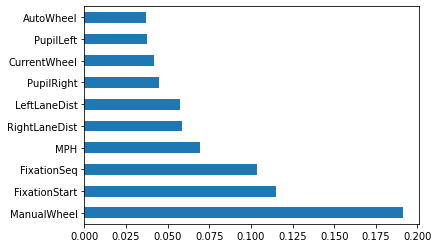

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()